In [1]:
## importt all the modules 

import pandas as pd
import quandl    #if necessary we can use it
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
##n_neighbors=5

In [3]:
##knn=neighbors.KNeighborsRegressor(n_neighbors)

In [4]:
##create a data frame 
quandl.ApiConfig.api_key = "zuiQMfguw3rRgLvkCzxk"
df=quandl.get('WIKI/GOOGl')
##df = pd.read_csv('google_stock.csv')
##df=df.set_index('Date')

In [5]:
## lets see the data
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
### create the specfic ammount of label and feture 
df1=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [7]:
df1.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [8]:
##a adding some more feture like volatility and PCT_change

df1['volatility']=(df1['Adj. High']-df1['Adj. Close'])/df1['Adj. Close']
df1['PCT_Change']=(df1['Adj. Close']-df1['Adj. Open'])/df1['Adj. Open'] 

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
## now making our final dataframe
df1=df1[['Adj. Close','volatility','PCT_Change','Adj. Open','Adj. Volume']]

In [10]:
df1.head()

,Adj. Close,volatility,PCT_Change,Adj. Open,Adj. Volume
Date,,,,,
2004-08-19,50.322842,0.037126,0.003250,50.159839,44659000.0
2004-08-20,54.322689,0.007109,0.072270,50.661387,22834300.0
2004-08-23,54.869377,0.037294,-0.012279,55.551482,18256100.0
2004-08-24,52.597363,0.064175,-0.057264,55.792225,15247300.0
2004-08-25,53.164113,0.018868,0.011837,52.542193,9188600.0


In [11]:
## setting the forcast column what se gonna predict
forcast_col='Adj. Close'

In [12]:


# we cant work with the null value so we replace with them with a negative large number of value
df1.fillna(-999999,inplace=True)



In [13]:
import math
## we gonna predict 20% of the data
forcast_out = int(math.ceil(.5*(len(df1))))

In [14]:
forcast_out

1712

In [15]:
from matplotlib import style

In [16]:
## lets plot the output before the prdiction
style.use('ggplot')
Y=df1[forcast_col]
X=range(len(df1[forcast_col]))

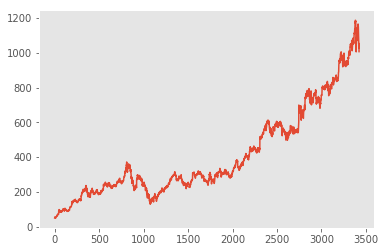

In [17]:
plt.grid()
plt.plot(X,Y)

In [18]:
## its time to make prediction
##first arrange the forcast column with assending order with a new label
df1['label'] = df[forcast_col].shift(-forcast_out)

In [19]:
df1['label'].head()

Date
2004-08-19    260.318579
2004-08-20    260.388795
2004-08-23    259.165018
2004-08-24    255.541332
2004-08-25    253.146439
Name: label, dtype: float64

In [20]:
df1[forcast_col][:10]

Date
2004-08-19    50.322842
2004-08-20    54.322689
2004-08-23    54.869377
2004-08-24    52.597363
2004-08-25    53.164113
2004-08-26    54.122070
2004-08-27    53.239345
2004-08-30    51.162935
2004-08-31    51.343492
2004-09-01    50.280210
Name: Adj. Close, dtype: float64

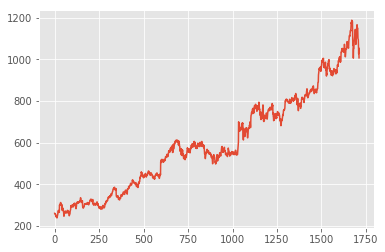

In [21]:
## lets plot the modified version
y1 = df1['label']
x1=range(len(df1['label']))
plt.plot(x1,y1)


In [22]:
## we need the data without the label for prediction so drop the label dont need it
from sklearn import preprocessing,cross_validation

/root/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X=np.array(df1.drop(['label'],1))

In [24]:
##scale the data
X=preprocessing.scale(X)
X=X[:-forcast_out]  ##data what is known
X_lately=X[-forcast_out:]
##X_lately.reshape(1, -1)##data which is not known
df1.dropna(inplace=True)

In [25]:
X     ## data without the out put

array([[-1.39187095,  2.33516806,  0.23254018, -1.39275669,  4.46712802],
       [-1.37635178, -0.31135438,  4.81828847, -1.39081124,  1.8207495 ],
       [-1.37423066,  2.35004252, -0.79917922, -1.37184315,  1.26561472],
       ...,
       [-0.55952762, -0.56416028,  0.07833924, -0.56096221, -0.4139766 ],
       [-0.56921858, -0.1762878 ,  0.15409327, -0.57179833, -0.52444093],
       [-0.57314946,  0.03618313, -0.50459066, -0.56561182, -0.47753906]])

In [26]:
Y=np.array(df1['label'])

In [27]:
Y    ## output data

array([ 260.31857851,  260.38879527,  259.16501758, ..., 1026.55      ,
       1054.09      , 1006.94      ])

In [28]:


#we create the trainig and testing data from the data we get
xtrain,xtest,ytrain,ytest=cross_validation.train_test_split(X,Y,test_size=0.2)



In [29]:
n_neighbors=5
clf1 = neighbors.KNeighborsRegressor(n_neighbors)  # create a classifire object
clf1.fit(xtrain,ytrain) # train data related with fir() method
accuracy1=clf1.score(xtest,ytest) # test data related with score() method
print "the accuracy is "+str(accuracy1)


the accuracy is 0.6454017811952215


In [30]:
from sklearn.linear_model import LinearRegression
clf2 = LinearRegression()  # create a classifire object
clf2.fit(xtrain,ytrain) # train data related with fir() method
accuracy2=clf2.score(xtest,ytest) # test data related with score() method
print "the accuracy is "+str(accuracy2)

the accuracy is 0.5414977898849487


In [31]:
from sklearn import svm
clf3 = svm.SVR()  # create a classifire object
clf3.fit(xtrain,ytrain) # train data related with fir() method
accuracy3=clf3.score(xtest,ytest) # test data related with score() method
print "the accuracy is "+str(accuracy3)

the accuracy is 0.266323670016667


In [32]:
def decision(accuracy1,accuracy2,accracy3):
    data=[accuracy1,accuracy2,accuracy3]
    result=max(data)
    if result == accuracy1:
        method = "KNN"
        
    elif result==accuracy2:
        method='LR'
    else:
        method='SVR'
    return method

In [33]:
best_method=decision(accuracy1,accuracy2,accuracy3)

In [34]:
best_method

'KNN'

In [35]:
def create_prediction_data(best_method):
    if best_method=="KNN":
        forcast_set=clf1.predict(X_lately)
    elif best_method=="LR":
        forcast_set=clf2.predict(X_lately)
    else :
        forcast_set=clf3.predict(X_lately)
    return forcast_set

In [36]:
forcast_set=create_prediction_data(best_method)


In [37]:
import datetime


In [38]:
#now create another label for forcast data that we need
df1['forcast']=np.nan



In [39]:
df1['forcast'].head() #allthe data will be nan 
#after getting the data we will fill the data

Date
2004-08-19   NaN
2004-08-20   NaN
2004-08-23   NaN
2004-08-24   NaN
2004-08-25   NaN
Name: forcast, dtype: float64

In [40]:
last_date=df1.iloc[-1].name





In [41]:
last_unix=last_date.timestamp() #it is a function of the time module that can convert the time to
#a computer can understand

In [42]:
one_day=86400 #in seconds
next_unix=last_unix+one_day  #next day


In [43]:
for i in forcast_set:    # iterating through the forcast set
    next_date = datetime.datetime.fromtimestamp(next_unix) # find the next date for the data
    next_unix+=one_day  #increment for finding next date
    df1.loc[next_date] =[np.nan for item in range(len(df1.columns)-1)]+[i]  #settinf up the date as a
    #index and adding value of the forast_set element with nand (adding value with nand will replace 
    #the value of the nan

Text(0,0.5,'Price')

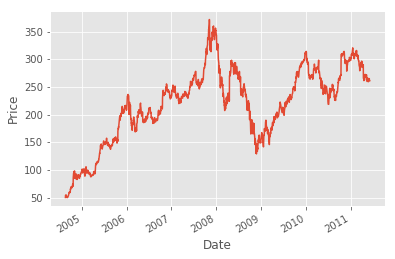

In [44]:
df1['Adj. Close'].plot()
plt.xlabel('Date')
plt.ylabel('Price')


## previous data plot

Text(0,0.5,'Price')

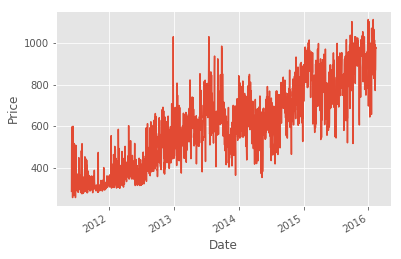

In [45]:
df1['forcast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')


Text(0,0.5,'Price')

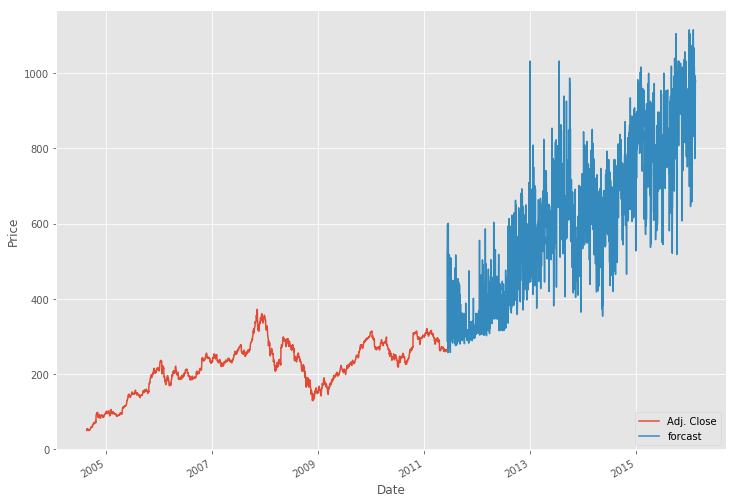

In [46]:
fig_size=[12,9]
#fig_size[0] = 12
#fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
df1['Adj. Close'].plot()
df1['forcast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')